In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import wbgapi as wb
import pandas_datareader.data as web
from src.utils import apply_matplotlib_settings
from src.quant.business_cycles.utils import plot_growth

apply_matplotlib_settings()

In [2]:
# Set graphical parameters
cycler = plt.cycler(
    linestyle=["-", "-.", "--", ":"],
    color=["#377eb8", "#ff7f00", "#4daf4a", "#ff334f"],
)
plt.rc("axes", prop_cycle=cycler)

In [3]:
gdp_growth_query = wb.series.info(q="GDP growth")
label = gdp_growth_query.items[0]["id"]

In [4]:
gdp_growth = wb.data.DataFrame(
    label,
    ["CHN", "USA", "DEU", "BRA", "ARG", "GBR", "JPN", "MEX", "TUR"],
    labels=True,
)
gdp_growth = gdp_growth.set_index("Country")
gdp_growth.columns = gdp_growth.columns.str.replace("YR", "").astype(int)
gdp_growth

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Turkiye,NaN,1.156069,5.571429,9.066306,5.459057,2.823530,11.212815,4.732510,6.777996,4.081146,...,8.485817,4.939715,6.084487,3.323084,7.501997,3.013180,0.818526,1.859840,11.439385,5.533469
Mexico,NaN,5.000000,4.664415,8.106887,11.905481,7.100000,6.096139,5.854925,9.423279,3.418620,...,0.852102,2.503764,2.702323,1.772493,1.871729,1.972082,-0.278149,-8.651587,5.837830,3.898231
Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,12.477895,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.643391,-0.402169,-4.147119,2.559320,0.954737
United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,1.924097,...,1.792322,3.195782,2.220258,1.921063,2.655070,1.403792,1.641611,-10.359901,8.674904,4.346561
Argentina,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,-0.659726,3.191997,4.822501,9.679526,...,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.617396,-2.000861,-9.900485,10.718010,4.956370
Brazil,NaN,8.600000,6.600000,0.600000,3.400000,2.400000,6.700000,4.200000,9.800000,9.500000,...,3.004823,0.503956,-3.545763,-3.275917,1.322869,1.783667,1.220778,-3.276759,4.988850,2.900531
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.075472,-3.826769,3.163820,1.806209
United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,3.100000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,1.935635
China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,16.940000,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.238638,8.448469,2.989084


In [5]:
events = [
    {"start": 1973, "end": 1975, "title": "Opec\nCrisis"},
    {"start": 1990, "end": 1991, "title": "90's recession\n(1991)"},
    {"start": 2007, "end": 2009, "title": "Great\nFinancial\nCrisis"},
    {"start": 2019, "end": 2020, "title": "Covid-19\n(2020)"},
]

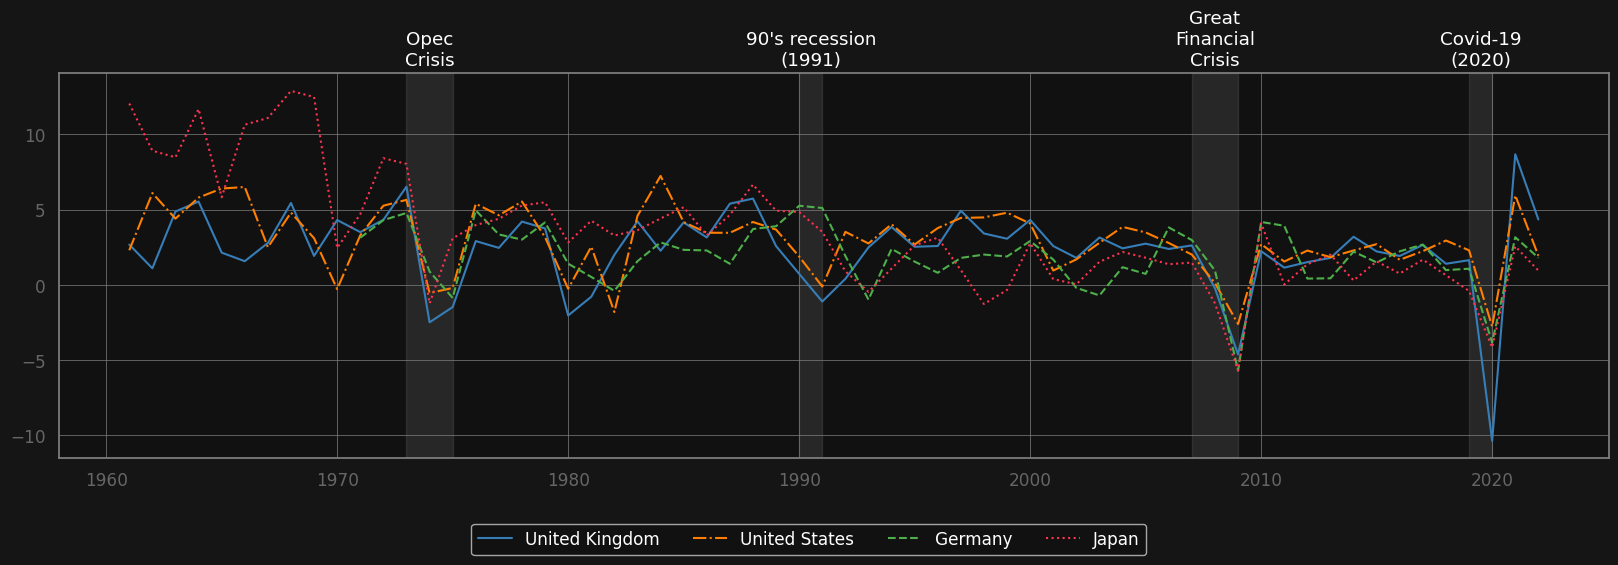

In [6]:
plot_growth(
    gdp_growth,
    ["United Kingdom", "United States", "Germany", "Japan"],
    events,
    figure_params={"figsize": (20, 5)},
)

#### Observations

1. Developed countries' business cycles are showing the tendency to becoming more synchronized as time passes.
1. Still, different countries respond differently to disturbances.

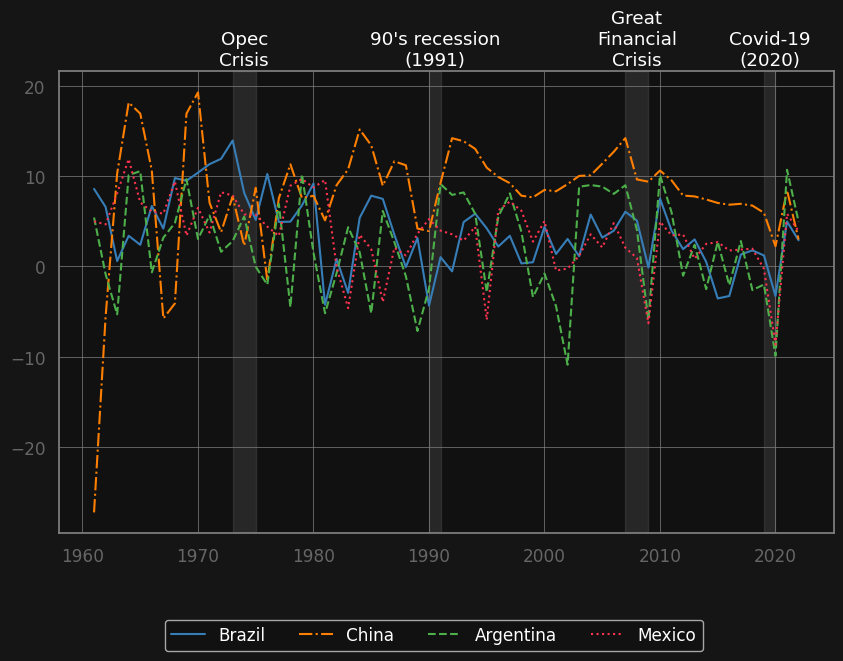

In [7]:
plot_growth(gdp_growth, ["Brazil", "China", "Argentina", "Mexico"], events)

#### Observations

1. Developing countries' response to crises is much more volatile compared to developed countries.
1. There is also much more variance in the way they respond to global crises as well.

## Unemployment Rate

In [14]:
unempl_rate = wb.data.DataFrame(
    "SL.UEM.TOTL.NE.ZS", ["USA", "FRA", "GBR", "JPN"], labels=True
)
unempl_rate = unempl_rate.set_index("Country")
unempl_rate.columns = unempl_rate.columns.str.replace("YR", "").astype(int)
unempl_rate

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Japan,1.7,1.4,1.3,1.3,1.1,1.2,1.3,1.3,1.2,1.1,...,4.038,3.589,3.385,3.132,2.822,2.467,2.351,2.809,2.828,2.600
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.525,6.110,5.301,4.810,4.330,3.996,3.737,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.913,10.273,10.354,10.057,9.410,9.018,8.415,8.010,7.874,7.308
United States,5.5,6.7,5.5,5.7,5.2,4.5,3.8,3.8,3.6,3.5,...,7.375,6.168,5.280,4.869,4.355,3.896,3.669,8.055,5.349,3.650


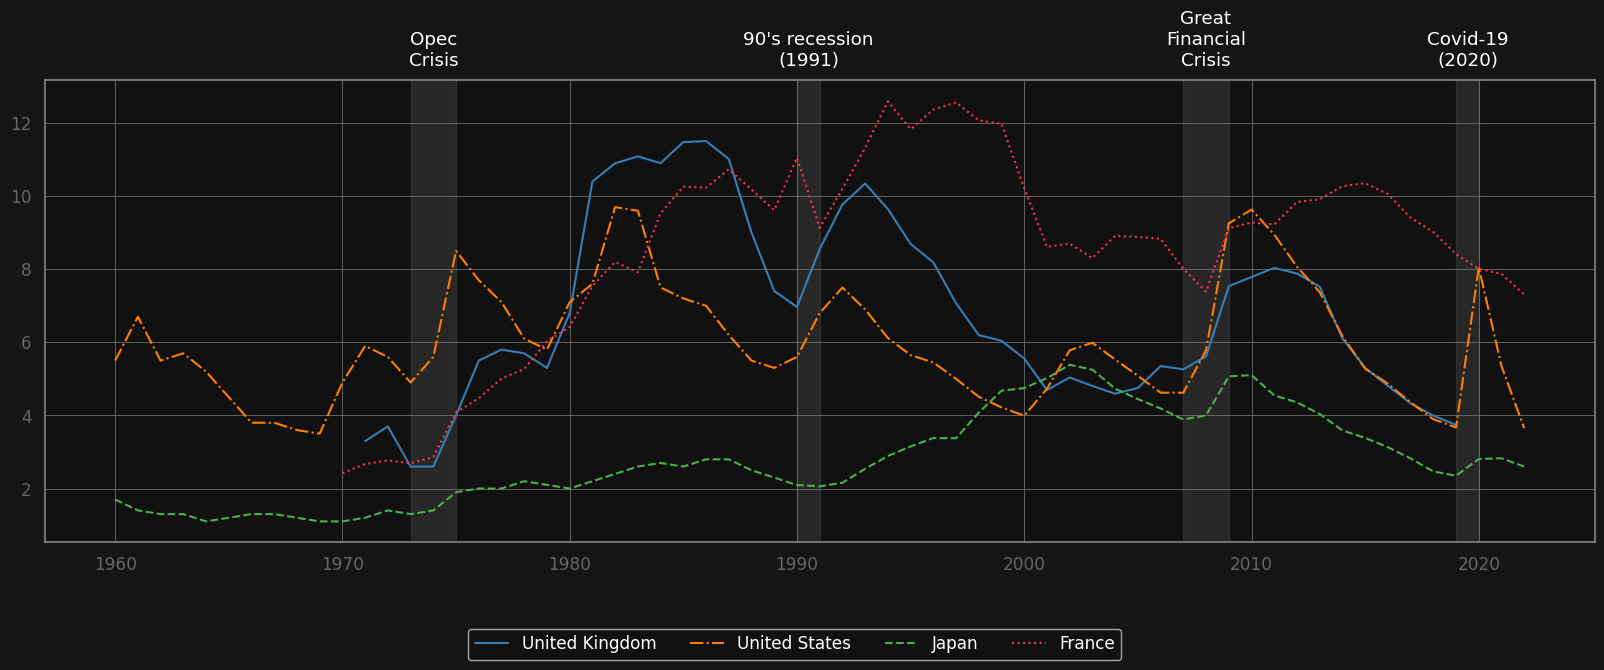

In [13]:
plot_growth(
    unempl_rate,
    ["United Kingdom", "United States", "Japan", "France"],
    events,
    figure_params={"figsize": (20, 6)},
)

#### Observations

1. Compared to other developed countries, Japan has a very stable and low unemployment rate.
1. Labor laws in France may be a strong factor in country's slow return to lower employment after global shocks.